#Regresión por mínimos cuadrados
Cuando los datos tienen errores sustanciales, la interpolación polinomial es inapropiada y puede dar resultados poco satisfactorios cuando se utiliza para predecir valores intermedios. Con frecuencia los datos experimentales son de este tipo.

Una estrategia más apropiada es en tales casos consiste en obtener una función de aproximación que se ajuste a la forma o a la tendencia general de los datos, sin coincidir necesariamente en todos los puntos.

Una forma de hacerlo es obtener una curva que minimice la discrepancia entre los puntos y la curva. Una técnica para lograr tal objetivo es la *regresión de mínimos cuadrados*.

#Regresión lineal
El ejemplo más simple de una aproximación de mínimos cuadrados es ajustar una línea recta a un conjunto de observaciones definidas por los puntos $(x_1,y_1)$, $(x_2,y_2)$,...,$(x_n,y_n)$. La expresión metemática para la línea recta es
\begin{equation}
y=a_0+a_1x+e
\end{equation}
donde $a_0$ y $a_1$ son coeficientes que representan la intersección con el eje $y$ y la pendiente, respectivamente, $e$ es el error, o la diferencia, entre el modelo y las observaciones, el cual se reordena como
 \begin{equation}
e=y-a_0-a_1x
\end{equation}
Si bien un criterio para un mejor ajuste de varias posibles opciones, la mejor consiste en minimizar la suma de los cuadrados de los residuos entre la $y$ medida y la $y$ calculada entre el modelo lineal:
 \begin{equation}
s_r=\sum_{i=1}^{n}e_i^2=\sum_{i=1}^{n}(y_{i,medida}-y_{i,modelo})^2=\sum_{i=1}^{n}(y-a_0-a_1x)^2
\end{equation}
Los valores de $a_0$ y $a_1$ etan dados por
\begin{equation}
a_1=\frac{n\sum x_iy_i-\sum x_i \sum y_i}{n\sum x_i^2-(\sum x_i)^2}
\end{equation}

\begin{equation}
a_0=\bar{y}-a_1\bar{x}
\end{equation}
donde $\bar{y}$ y $\bar{x}$ son las medias de $y$ y $x$, respectivamente.

Dos cantidades que explican la variabilidad de los datos son el *coeficiente de determinación* $r^2$ y el *coeficiente de correlación* $r$, que estan dados por
\begin{equation}
r^2=\frac{S_t-S_r}{S_t}
\end{equation}
En un ajuste perfecto $S_r=0$ y $r=r^2=0$. Si $r=r^2=0$ y $S_r=S_t$ el ajuste no presenta ninguna mejora.

#Ejemplo:
Realizar la regresión lineal de los siguientes datos:


              x                      y             xy             x^2      
             2.5                   13.0           32.5            6.2      
             3.5                   11.0           38.5           12.2      
             5.0                    8.5           42.5           25.0      
             6.0                    8.2           49.2           36.0      
             7.5                    7.0           52.5           56.2      
             10.0                   6.2           62.0           100.0     
             12.5                   5.2           65.0           156.2     
             15.0                   4.8           72.0           225.0     
             17.5                   4.6           80.5           306.2     
             20.0                   4.3           86.0           400.0     
SUMA         99.5                 72.8            580.7         1323.25    

         (y-yprom)^2            y calculada    (y-y_cal)^2  
            32.718        

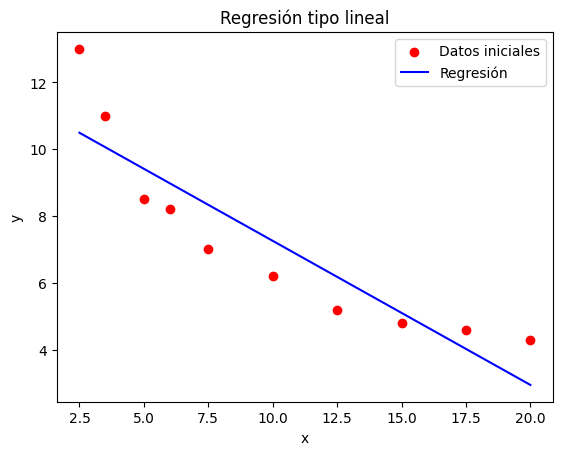

In [8]:
#Código hecho por: Diana Ailed Hernández Bustos
import numpy as np
import matplotlib.pyplot as plt
from  math import *

x = np.array([2.5,3.5,5,6,7.5,10,12.5,15,17.5,20])
y = np.array([13,11,8.5,8.2,7,6.2,5.2,4.8,4.6,4.3])
k = len(x)

sumax = 0
sumay = 0
sumaxy = 0
sumaxx = 0

x_y = np.zeros(k)
x_x = np.zeros(k)

print('{:^30}{:^15}{:^15}{:^15}'.format('x', 'y','xy', 'x^2'))

for i in range (0, k):
    x_prom = x[i] + sumax
    sumax = x_prom
    y_prom = y[i] + sumay
    sumay = y_prom

    x_y[i] = x[i]*y[i]
    sumaxy = x_y[i] + sumaxy
    x_x[i] = pow(x[i], 2)
    sumaxx = x_x[i] +sumaxx
    #print('{:^30}{:^15}{:^15}{:^15}'.format(x[i], y[i], x_y[i], x_x[i]))
    print('{:^30}{:^15,.1f}{:^15,.1f}{:^15,.1f}'.format(x[i], y[i], x_y[i], x_x[i]))

x_prom = sumax/k
y_prom = sumay/k
x_y = sumaxy
x_x = sumaxx
print('{:^0}{:^23}{:^19}{:^14}{:^15}'.format("SUMA", sumax, sumay, sumaxy, sumaxx))

#2°PARTE DE CÁLCULOS
# Cálculo de a0 y a1:
a1 = (k*(sumaxy)-(sumax)*(sumay))/ (k*sumaxx - pow(sumax, 2))
a0 = y_prom - x_prom*a1

sumay_yprom2 = 0
sumaycal = 0
sumay_ycal2 = 0
y_yprom2 = np.zeros(k)
ycal = np.zeros(k)
y_ycal2 = np.zeros(k)

print('\n{:^30}{:^15}{:^15}'.format("(y-yprom)^2","y calculada", "(y-y_cal)^2"))
for i in range(k):
    y_yprom2[i] = (y[i] - y_prom)**2
    sumay_yprom2 += y_yprom2[i]

    ycal[i] = (a0 + (x[i]*a1))
    sumaycal += ycal[i]

    y_ycal2[i] = (y[i] - ycal[i])**2
    sumay_ycal2 += y_ycal2[i]
    print('{:^30,.3f}{:^15,.3f}{:^15,.3f}'.format(y_yprom2[i], ycal[i], y_ycal2[i]))

print('{:^0}{:^23,.3f}{:^19,.3f}{:^14,.3f}'.format("SUMA", sumay_yprom2, sumaycal, sumay_ycal2))

#RESULTADOS:
print("\nVALORES IMPORTANTES: ")
print("a1 = {:.4f} ".format(a1))
print("a0 = {:.4f} ".format(a0))
Sr = sumay_ycal2
St = sumay_yprom2
r2 = (St-Sr)/St
r = sqrt(r2) #Coeficiente de correlación
print("Sr = {:.4f} ".format(Sr))
print("St = {:.4f} ".format(St))
print("r^2 = {:.4f} ".format(r2))
print("Coeficiente de correlación r = {:.4f} ".format(r))

#GRÁFICA DE DATOS:
y2 = np.zeros(k) #En este caso y2 = y calculado

print("\nDATOS DE MODELACIÓN:")
print('{:^30}{:^15}'.format('x', 'y regresión'))
for i in range(k):
    y2[i] = ycal[i]
    print("{:^30,.3f}{:^15,.3f}".format(x[i],y2[i]))


plt.title("Regresión tipo lineal")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x, y, color='red', label = 'Datos iniciales')
plt.plot(x, y2, '-', color='blue', label = 'Regresión')
plt.legend()
plt.show()

#Linealización de modelos no lineales



#Modelo exponencial
En modelos que no son lineales se pueden utilizar transformaciones para expresar los datos en una forma que sea compatible con la regresión lineal.

Uno de esos modelos es el modelo *exponencial*
\begin{equation}
y=\alpha_1e^{\beta_1}
\end{equation}
donde $\alpha_1$ y $\beta_1$ son constantes. Luego, ser realiza la transformación aplicando logaritmo natural
\begin{equation}
\ln y=\ln\alpha_1+\beta_1x
\end{equation}
Primero se encuentra $a_0$ y $a_1$ y luego se despeja para encontrar $\alpha_1$ y $\beta_1$, para graficar el resultado.

              x                   y=ln(y)          xy             x^2      
            2.500                  2.565          6.412          6.250     
            3.500                  2.398          8.393         12.250     
            5.000                  2.140         10.700         25.000     
            6.000                  2.104         12.625         36.000     
            7.500                  1.946         14.594         56.250     
            10.000                 1.825         18.245         100.000    
            12.500                 1.649         20.608         156.250    
            15.000                 1.569         23.529         225.000    
            17.500                 1.526         26.706         306.250    
            20.000                 1.459         29.172         400.000    
SUMA        99.500               19.179          170.986       1,323.250   

         (y-yprom)^2            y calculada    (y-y_cal)^2  
            0.419         

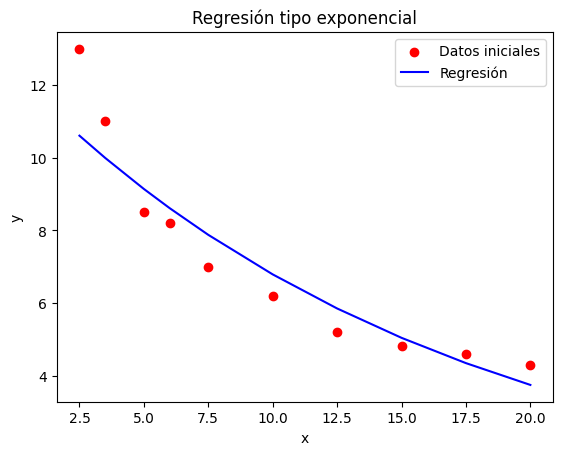

In [9]:
x = np.array([2.5,3.5,5,6,7.5,10,12.5,15,17.5,20])
y1 = np.array([13,11,8.5,8.2,7,6.2,5.2,4.8,4.6,4.3])
k = len(x)

#Hago cambio de y, de x no es ncesario
y = np.zeros(k)

for i in range(k):
    y[i] = log(y1[i]) #Aquí saco ln de y

#Ahora prosigo con cálculo normal
sumax = 0
sumay = 0
sumaxy = 0
sumaxx = 0

x_y = np.zeros(k)
x_x = np.zeros(k)

print('{:^30}{:^15}{:^15}{:^15}'.format('x', 'y=ln(y)','xy', 'x^2'))

for i in range (0, k):
    x_prom = x[i] + sumax
    sumax = x_prom
    y_prom = y[i] + sumay
    sumay = y_prom

    x_y[i] = x[i]*y[i]
    sumaxy = x_y[i] + sumaxy
    x_x[i] = pow(x[i], 2)
    sumaxx = x_x[i] +sumaxx
    #print('{:^30}{:^15}{:^15}{:^15}'.format(x[i], y[i], x_y[i], x_x[i]))
    print('{:^30,.3f}{:^15,.3f}{:^15,.3f}{:^15,.3f}'.format(x[i], y[i], x_y[i], x_x[i]))

x_prom = sumax/k
y_prom = sumay/k
x_y = sumaxy
x_x = sumaxx
print('{:^0}{:^23,.3f}{:^19,.3f}{:^14,.3f}{:^15,.3f}'.format("SUMA", sumax, sumay, sumaxy, sumaxx))

#2°PARTE DE CÁLCULOS
# Cálculo de a0 y a1:
a1 = (k*(sumaxy)-(sumax)*(sumay))/ (k*sumaxx - pow(sumax, 2))
a0 = y_prom - x_prom*a1

#AHORA OBTENGO ALFA Y BETA
alfa1 = exp(a0)
beta1 = a1

#SIGO CON PROCEDIMIENTO (todavía no se usan alfa ni beta)
sumay_yprom2 = 0
sumaycal = 0
sumay_ycal2 = 0
y_yprom2 = np.zeros(k)
ycal = np.zeros(k)
y_ycal2 = np.zeros(k)

print('\n{:^30}{:^15}{:^15}'.format("(y-yprom)^2","y calculada", "(y-y_cal)^2"))
for i in range(k):
    y_yprom2[i] = (y[i] - y_prom)**2
    sumay_yprom2 += y_yprom2[i]

    ycal[i] = (a0 + (x[i]*a1))
    sumaycal += ycal[i]

    y_ycal2[i] = (y[i] - ycal[i])**2
    sumay_ycal2 += y_ycal2[i]
    print('{:^30,.3f}{:^15,.3f}{:^15,.3f}'.format(y_yprom2[i], ycal[i], y_ycal2[i]))

print('{:^0}{:^23,.3f}{:^19,.3f}{:^14,.3f}'.format("SUMA", sumay_yprom2, sumaycal, sumay_ycal2))

#RESULTADOS:
print("\nVALORES IMPORTANTES: ")
print("a1 = {:.4f} ".format(a1))
print("a0 = {:.4f} ".format(a0))
print("alfa1 = {:.4f} ".format(alfa1))
print("beta1 = {:.4f} ".format(beta1))
Sr = sumay_ycal2
St = sumay_yprom2
r2 = (St-Sr)/St
r = sqrt(r2) #Coeficiente de correlación
print("Sr = {:.4f} ".format(Sr))
print("St = {:.4f} ".format(St))
print("r^2 = {:.4f} ".format(r2))
print("Coeficiente de correlación r = {:.4f} ".format(r))

#GRÁFICA DE DATOS:
y2 = np.zeros(k) #En este caso y2 = es alfa*exp(beta*x)

print("\nDATOS DE MODELACIÓN:")
print('{:^30}{:^15}'.format('x', 'y regresión'))
for i in range(k):
    y2[i] = alfa1*exp(x[i]*beta1)
    print("{:^30,.3f}{:^15,.3f}".format(x[i],y2[i]))

plt.title("Regresión tipo exponencial")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x, y1, color='red', label = 'Datos iniciales')
plt.plot(x, y2, '-', color='blue', label = 'Regresión')
plt.legend()
plt.show()

#Modelo de ecuación de potencias
Este modelo esta dado por
\begin{equation}
y=\alpha_2x^{\beta_2}
\end{equation}
donde $\alpha_2$ y $\beta_2$ son coeficientes constantes. Al igual que el procedimiento anterior, se le aplica una transformación, solo que en este caso se le aplica logaritmo vulgar, obteniendo así
\begin{equation}
\log y=\log \beta_2x+\alpha_2
\end{equation}
al igual que el caso anterior, se encuentran los valores de $\alpha_2$ y $\beta_2$ haciendo el despeje de $a_0$ y $a_1$.

           x=log(x)              y=log(y)          xy             x^2      
            0.398                  1.114          0.443          0.158     
            0.544                  1.041          0.567          0.296     
            0.699                  0.929          0.650          0.489     
            0.778                  0.914          0.711          0.606     
            0.875                  0.845          0.740          0.766     
            1.000                  0.792          0.792          1.000     
            1.097                  0.716          0.785          1.203     
            1.176                  0.681          0.801          1.383     
            1.243                  0.663          0.824          1.545     
            1.301                  0.633          0.824          1.693     
SUMA         9.111                8.330           7.137          9.138     

         (y-yprom)^2            y calculada    (y-y_cal)^2  
            0.079         

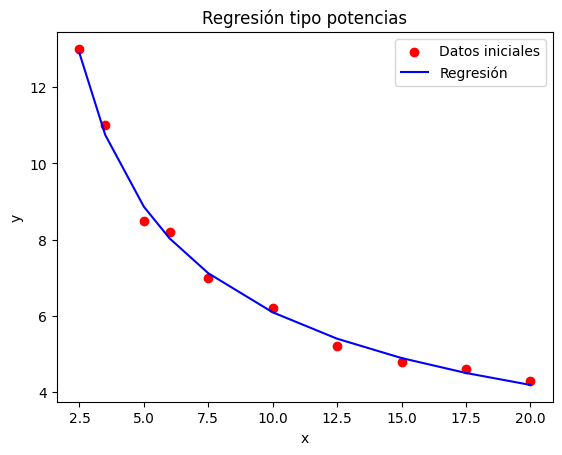

RESPUESTA
Cuando x = 9, y = 6.451452952701601


In [10]:
x1 = np.array([2.5,3.5,5,6,7.5,10,12.5,15,17.5,20])
y1 = np.array([13,11,8.5,8.2,7,6.2,5.2,4.8,4.6,4.3])
k = len(x)

#Se hace cambio de y y de x
y = np.zeros(k)
x = np.zeros(k)
for i in range(k):
    x[i] = log(x1[i],10)
    y[i] = log(y1[i],10)

#Ahora se prosigue con cálculo normal
sumax = 0
sumay = 0
sumaxy = 0
sumaxx = 0

x_y = np.zeros(k)
x_x = np.zeros(k)

print('{:^30}{:^15}{:^15}{:^15}'.format('x=log(x)', 'y=log(y)','xy', 'x^2'))

for i in range (0, k):
    x_prom = x[i] + sumax
    sumax = x_prom
    y_prom = y[i] + sumay
    sumay = y_prom

    x_y[i] = x[i]*y[i]
    sumaxy = x_y[i] + sumaxy
    x_x[i] = pow(x[i], 2)
    sumaxx = x_x[i] +sumaxx
    #print('{:^30}{:^15}{:^15}{:^15}'.format(x[i], y[i], x_y[i], x_x[i]))
    print('{:^30,.3f}{:^15,.3f}{:^15,.3f}{:^15,.3f}'.format(x[i], y[i], x_y[i], x_x[i]))

x_prom = sumax/k
y_prom = sumay/k
x_y = sumaxy
x_x = sumaxx
print('{:^0}{:^23,.3f}{:^19,.3f}{:^14,.3f}{:^15,.3f}'.format("SUMA", sumax, sumay, sumaxy, sumaxx))

#2°PARTE DE CÁLCULOS
# Cálculo de a0 y a1:
a1 = (k*(sumaxy)-(sumax)*(sumay))/ (k*sumaxx - pow(sumax, 2))
a0 = y_prom - x_prom*a1

#Se obtiene ALFA Y BETA
alfa2 = 10**(a0)
beta2 = a1

#CONTINUA CON PROCEDIMIENTO (todavía no se usan alfa ni beta)
sumay_yprom2 = 0
sumaycal = 0
sumay_ycal2 = 0
y_yprom2 = np.zeros(k)
ycal = np.zeros(k)
y_ycal2 = np.zeros(k)

print('\n{:^30}{:^15}{:^15}'.format("(y-yprom)^2","y calculada", "(y-y_cal)^2"))
for i in range(k):
    y_yprom2[i] = (y[i] - y_prom)**2
    sumay_yprom2 += y_yprom2[i]

    ycal[i] = (a0 + (x[i]*a1))
    sumaycal += ycal[i]

    y_ycal2[i] = (y[i] - ycal[i])**2
    sumay_ycal2 += y_ycal2[i]
    print('{:^30,.3f}{:^15,.3f}{:^15,.3f}'.format(y_yprom2[i], ycal[i], y_ycal2[i]))

print('{:^0}{:^23,.3f}{:^19,.3f}{:^14,.3f}'.format("SUMA", sumay_yprom2, sumaycal, sumay_ycal2))

#RESULTADOS:
print("\nVALORES IMPORTANTES: ")
print("a1 = {:.4f} ".format(a1))
print("a0 = {:.4f} ".format(a0))
print("alfa2 = {:.4f} ".format(alfa2))
print("beta2 = {:.4f} ".format(beta2))
Sr = sumay_ycal2
St = sumay_yprom2
r2 = (St-Sr)/St
r = sqrt(r2) #Coeficiente de correlación
print("Sr = {:.4f} ".format(Sr))
print("St = {:.4f} ".format(St))
print("r^2 = {:.4f} ".format(r2))
print("Coeficiente de correlación r = {:.4f} ".format(r))

#GRÁFICA DE DATOS:
y2 = np.zeros(k) #En este caso y2 = es alfa*exp(beta*x)

print("\nDATOS DE MODELACIÓN:")
print('{:^30}{:^15}'.format('x', 'y regresión'))
for i in range(k):
    y2[i] = alfa2*(pow(x1[i], beta2))
    print("{:^30,.3f}{:^15,.3f}".format(x1[i],y2[i]))

plt.title("Regresión tipo potencias")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x1, y1, color='red', label = 'Datos iniciales')
plt.plot(x1, y2, '-', color='blue', label = 'Regresión')
plt.legend()
plt.show()

#La ec de potencias resultante es y = alfa2*x^Beta2
x0 = 9
y0 = alfa2*x0**beta2
print ("RESPUESTA")
print("Cuando x = 9, y =", y0)

#Modelo inverso
Un último ejemplo es la ecuación
\begin{equation}
y=\alpha_3\frac{x}{{\beta_3+x}}
\end{equation}
donde $\alpha_3$ y $\beta_3$ son coeficientes constantes. Para este caso, se usa la transformación
\begin{equation}
\frac{1}{y}=\frac{\beta_3}{\alpha_3}\frac{1}{{x}}+\frac{1}{\alpha_3}
\end{equation}
Al igual que en los casos anteriores, se obtienen primero $a_0$ y $a_1$, y con esto se buscan $\alpha_3$ y $\beta_3$ haciendo un despeje.

           x=log(x)              y=log(y)          xy             x^2      
            0.400                  0.077          0.031          0.160     
            0.286                  0.091          0.026          0.082     
            0.200                  0.118          0.024          0.040     
            0.167                  0.122          0.020          0.028     
            0.133                  0.143          0.019          0.018     
            0.100                  0.161          0.016          0.010     
            0.080                  0.192          0.015          0.006     
            0.067                  0.208          0.014          0.004     
            0.057                  0.217          0.012          0.003     
            0.050                  0.233          0.012          0.003     
SUMA         1.540                1.562           0.189          0.354     

         (y-yprom)^2            y calculada    (y-y_cal)^2  
            0.006         

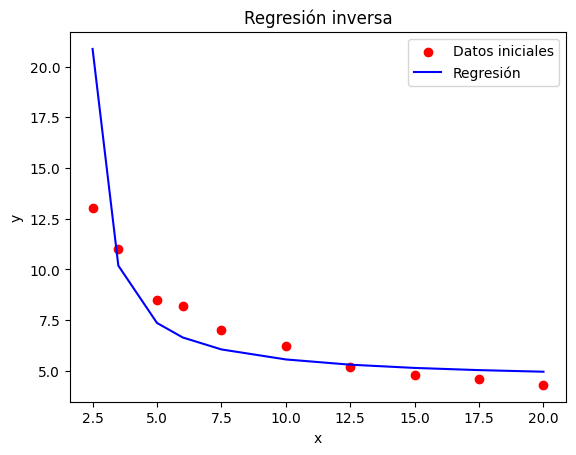

In [11]:
x1 = np.array([2.5,3.5,5,6,7.5,10,12.5,15,17.5,20])
y1 = np.array([13,11,8.5,8.2,7,6.2,5.2,4.8,4.6,4.3])
k = len(x1)

#Se hace el cambio de y y de x
x = np.zeros(k)
y = np.zeros(k)
for i in range(k):
    x[i] = 1/x1[i]
    y[i] = 1/y1[i]

#Ahora se prosigue con cálculo normal
sumax = 0
sumay = 0
sumaxy = 0
sumaxx = 0

x_y = np.zeros(k)
x_x = np.zeros(k)

print('{:^30}{:^15}{:^15}{:^15}'.format('x=log(x)', 'y=log(y)','xy', 'x^2'))

for i in range (0, k):
    x_prom = x[i] + sumax
    sumax = x_prom
    y_prom = y[i] + sumay
    sumay = y_prom

    x_y[i] = x[i]*y[i]
    sumaxy = x_y[i] + sumaxy
    x_x[i] = pow(x[i], 2)
    sumaxx = x_x[i] +sumaxx
    #print('{:^30}{:^15}{:^15}{:^15}'.format(x[i], y[i], x_y[i], x_x[i]))
    print('{:^30,.3f}{:^15,.3f}{:^15,.3f}{:^15,.3f}'.format(x[i], y[i], x_y[i], x_x[i]))

x_prom = sumax/k
y_prom = sumay/k
x_y = sumaxy
x_x = sumaxx
print('{:^0}{:^23,.3f}{:^19,.3f}{:^14,.3f}{:^15,.3f}'.format("SUMA", sumax, sumay, sumaxy, sumaxx))

#2°PARTE DE CÁLCULOS
# Cálculo de a0 y a1:
a1 = (k*(sumaxy)-(sumax)*(sumay))/ (k*sumaxx - pow(sumax, 2))
a0 = y_prom - x_prom*a1

#AHORA SE OBTIENE ALFA Y BETA
alfa3 = 1/ a0
beta3 = a1*alfa3

#SIGUE CON PROCEDIMIENTO (todavía no se usan alfa ni beta)
sumay_yprom2 = 0
sumaycal = 0
sumay_ycal2 = 0
y_yprom2 = np.zeros(k)
ycal = np.zeros(k)
y_ycal2 = np.zeros(k)

print('\n{:^30}{:^15}{:^15}'.format("(y-yprom)^2","y calculada", "(y-y_cal)^2"))
for i in range(k):
    y_yprom2[i] = (y[i] - y_prom)**2
    sumay_yprom2 += y_yprom2[i]

    ycal[i] = (a0 + (x[i]*a1))
    sumaycal += ycal[i]

    y_ycal2[i] = (y[i] - ycal[i])**2
    sumay_ycal2 += y_ycal2[i]
    print('{:^30,.3f}{:^15,.3f}{:^15,.3f}'.format(y_yprom2[i], ycal[i], y_ycal2[i]))

print('{:^0}{:^23,.3f}{:^19,.3f}{:^14,.3f}'.format("SUMA", sumay_yprom2, sumaycal, sumay_ycal2))

#RESULTADOS:
print("\nVALORES IMPORTANTES: ")
print("a1 = {:.4f} ".format(a1))
print("a0 = {:.4f} ".format(a0))
print("alfa3 = {:.4f} ".format(alfa3))
print("beta3 = {:.4f} ".format(beta3))
Sr = sumay_ycal2
St = sumay_yprom2
r2 = (St-Sr)/St
r = sqrt(r2) #Coeficiente de correlación
print("Sr = {:.4f} ".format(Sr))
print("St = {:.4f} ".format(St))
print("r^2 = {:.4f} ".format(r2))
print("Coeficiente de correlación r = {:.4f} ".format(r))

#GRÁFICA DE DATOS:
y2 = np.zeros(k) #En este caso y2 = es alfa*exp(beta*x)

print("\nDATOS DE MODELACIÓN:")
print('{:^30}{:^15}'.format('x', 'y regresión'))
for i in range(k):
    y2[i] = alfa3*(x1[i]/(beta3 + x1[i]))
    print("{:^30,.3f}{:^15,.3f}".format(x1[i],y2[i]))

plt.title("Regresión inversa")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x1, y1, color='red', label = 'Datos iniciales')
plt.plot(x1, y2, '-', color='blue', label = 'Regresión')
plt.legend()
plt.show()